In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


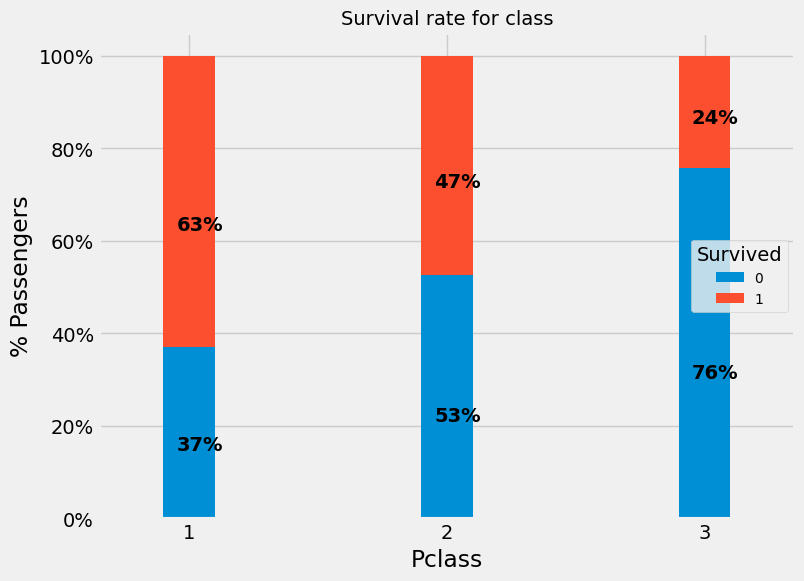

In [5]:
class_and_survived = df.groupby(["Pclass", "Survived"]).size().unstack()

ax = (class_and_survived.T*100.0 / class_and_survived.T.sum()).T.plot(kind="bar",
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate for class", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

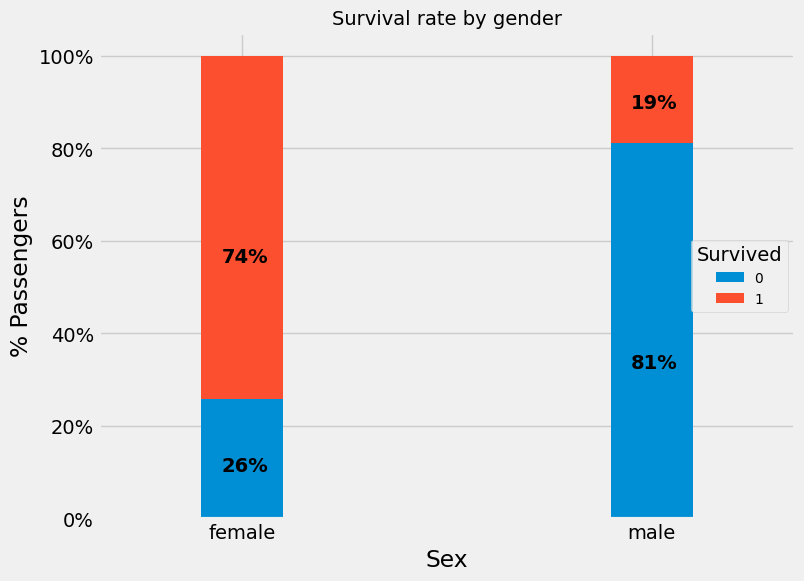

In [6]:
sex_and_survived = df.groupby(["Sex", "Survived"]).size().unstack()

ax = (sex_and_survived.T*100.0 / sex_and_survived.T.sum()).T.plot(kind="bar",
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate by gender", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

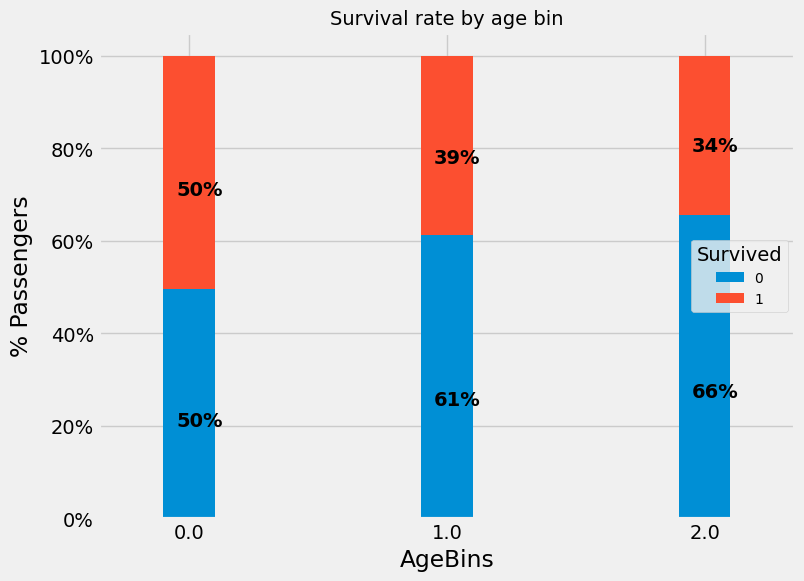

In [7]:
df["AgeBins"] = pd.cut(df["Age"], [0, 18, 50, 100], labels=False)

age_and_survived = df.groupby(["AgeBins", "Survived"]).size().unstack()

ax = (age_and_survived.T*100.0 / age_and_survived.T.sum()).T.plot(kind="bar",
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate by age bin", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

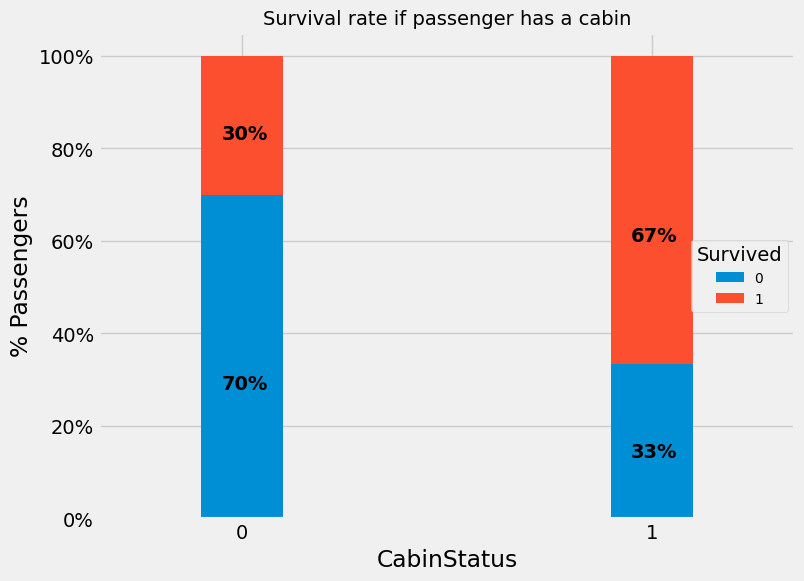

In [8]:
df["CabinStatus"] = df.Cabin.apply(lambda x: 1 if pd.notnull(x) else 0)

cabin_and_survived = df.groupby(["CabinStatus", "Survived"]).size().unstack()

ax = (cabin_and_survived.T*100.0 / cabin_and_survived.T.sum()).T.plot(kind="bar",
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate if passenger has a cabin", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

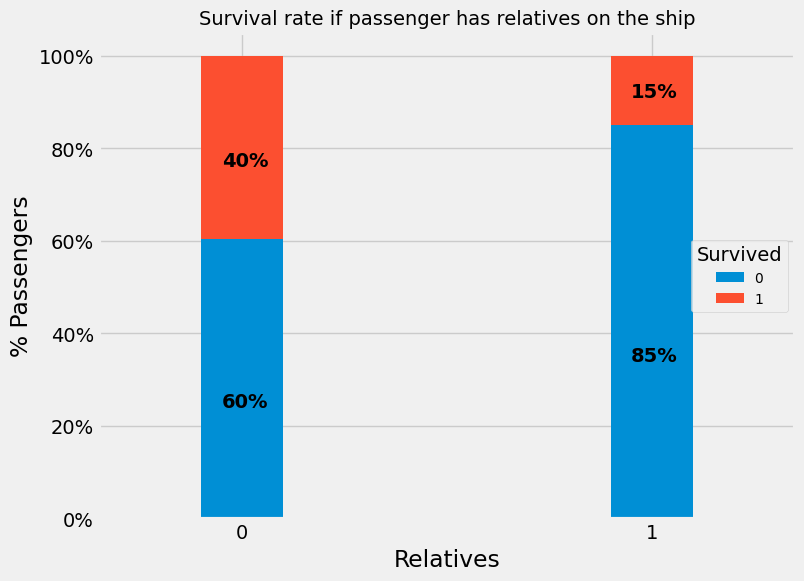

In [9]:
df["Relatives"] = df[["SibSp", "Parch"]].sum(axis=1)
df["Relatives"] = pd.cut(df["Relatives"], bins=[-1, 4, 100], labels=False)

relatives_and_survived = df.groupby(["Relatives", "Survived"]).size().unstack()

ax = (relatives_and_survived.T*100.0 / relatives_and_survived.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate if passenger has relatives on the ship", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

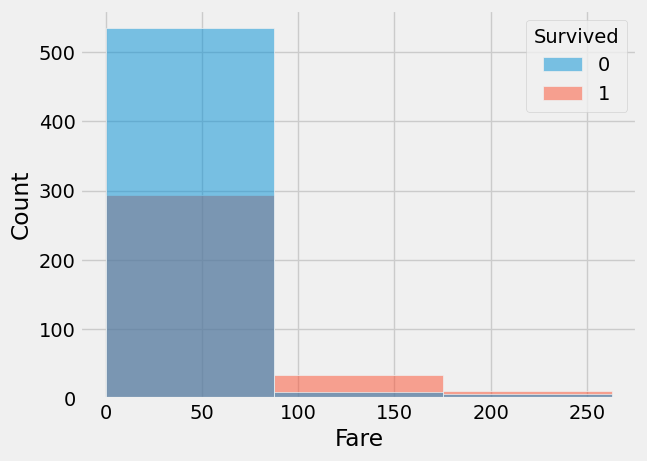

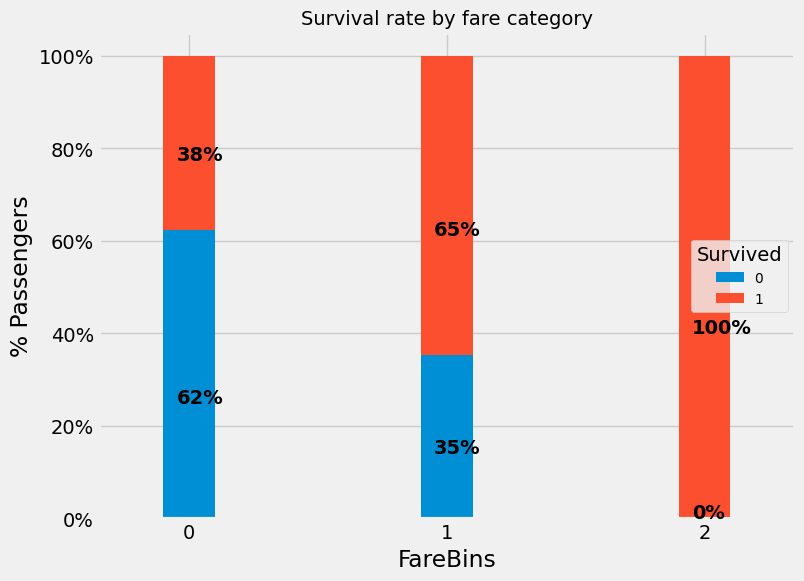

In [10]:
sns.histplot(df[df["Fare"]<500], x="Fare", hue="Survived", bins=3)

df["FareBins"] = pd.cut(df["Fare"], bins=3, labels=False)

fare_and_survived = df.groupby(["FareBins", "Survived"]).size().unstack()

ax = (fare_and_survived.T*100.0 / fare_and_survived.T.sum()).T.plot(kind="bar",
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate by fare category", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

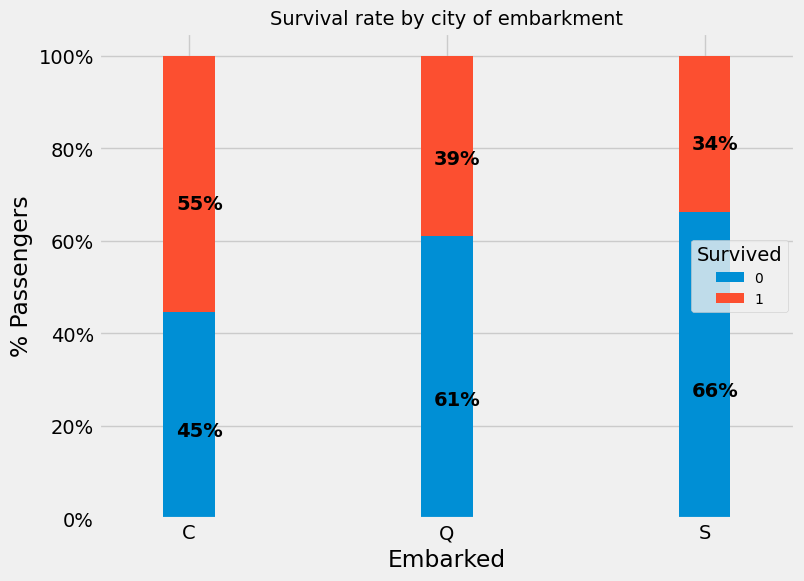

In [11]:
embarked_and_survived = df.groupby(["Embarked", "Survived"]).size().unstack()

ax = (embarked_and_survived.T*100.0 / embarked_and_survived.T.sum()).T.plot(kind="bar",
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="right", prop={"size":10}, title = "Survived")
ax.set_ylabel("% Passengers")
ax.set_title("Survival rate by city of embarkment", size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0f}%".format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = "black",
               weight = "bold", size =14)

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold

class TransformationImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        try:
            # Age transformation:
            X["NameTitle"] = X["Name"].apply(lambda x: x.split(",")[1].split(".")[0]\
                                       .lstrip())
            X["Age"] = X["Age"].fillna(X.groupby(["NameTitle", "Sex"])["Age"]\
                                     .transform("mean"))
            X["Age"] = X["Age"].fillna(X.groupby(["Sex"])["Age"].transform("mean"))
            X["AgeBins"] = pd.cut(X["Age"], [0, 18, 50, 100], labels=False)
            # Has Cabin:
            X["CabinStatus"] = X.Cabin.apply(lambda x: 1 if pd.notnull(x) else 0)
            # Fare transformation:
            X["Fare"] = X["Fare"].fillna(X.groupby(["Embarked", "Pclass"])["Fare"]\
                                     .transform("mean"))
            X["FareBins"] = pd.cut(X["Fare"], bins=3, labels=False)
            # Number of relatives:
            X["Relatives"] = X[["SibSp", "Parch"]].sum(axis=1)
            X["Relatives"] = pd.cut(X["Relatives"], bins=[-1, 1, 4, 100], labels=False)
            X = X[X["Embarked"].notna()]
        except:
            pass
        return X

In [13]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # encoder = OneHotEncoder()
        col_dict = {
            "Pclass": [f"Class{str(x)}" for x in X["Pclass"].unique()],
            "Sex": [s.capitalize() for s in X["Sex"].unique().tolist()],
            "AgeBins": ["Young", "Adult", "Senior"],
            "CabinStatus": ["HasCabin", "NoCabin"],
            "Relatives": ["Alone", "Few", "Many"],
            "FareBins": ["Cheap", "Expensive", "Luxury"],
            "Embarked": X["Embarked"].unique().tolist()
        }
        for c in col_dict.keys():
            dummies = OneHotEncoder().fit_transform(X[c].values.reshape(-1, 1)).toarray()
            X[col_dict[c]] = pd.DataFrame(dummies, index = X.index)
            X.drop(columns=[c], inplace=True)
        return X

In [14]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.drop(columns=["PassengerId", "Name", "NameTitle", "Ticket",
                        "Cabin", "Fare", "Age", "SibSp", "Parch"], axis=1,
               errors="ignore", inplace=True)
        return X

In [15]:
from sklearn.preprocessing import StandardScaler

class DataScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        scaler = StandardScaler()
        try:
            y = X["Survived"]
            X.drop(columns="Survived", axis=1, inplace=True)
            X.columns = X.columns.astype(str)
            X_train = scaler.fit_transform(X)
            y_train = y.to_numpy()
            return X_train, y_train, X.columns
        except:
            X.columns = X.columns.astype(str)
            X_train = scaler.fit_transform(X)
            return X_train

In [16]:
from sklearn.preprocessing import StandardScaler

class DataToNumpy(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        try:
            y = X["Survived"]
            X.drop(columns="Survived", axis=1, inplace=True)
            X_train = X.to_numpy()
            y_train = y.to_numpy()
            return X_train, y_train
        except:
            X_train = X.to_numpy()
            return X_train

In [17]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("age_imputer", TransformationImputer()),
                     ("feature_encoder", FeatureEncoder()),
                     ("feature_dropper", FeatureDropper()),
                     ("data_scaler", DataScaler())])

In [18]:
X_train, y_train, features = pipeline.fit_transform(df)
print(X_train.shape)

(889, 19)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

rfc = RandomForestClassifier(random_state=14)
param_grid = {
              "max_depth": range(2, 10),
              # "n_estimators": range(1, 20),
              # "max_features": range(0, len(df.columns)+1),
              "max_leaf_nodes": range(0,50,10),
              "min_samples_leaf": range(1,10),
              "min_samples_split": range(1,10),
              # "criterion": ["gini", "entropy"],
              # "class_weight": ["balanced", None],
              # "ccp_alpha": stats.uniform(0, 0.00005)
              }

skf = StratifiedKFold(random_state=14, shuffle=True)

grid_search = GridSearchCV(rfc, param_grid, cv=skf, scoring="f1", return_train_score=True)
grid_search.fit(X_train, y_train)

In [20]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(random_state=14)

In [21]:
grid_search.best_score_

0.7357850508624504

In [22]:
X_train.shape[1]

19

In [23]:
best_rfc.feature_importances_

array([0.03886113, 0.0324857 , 0.08494215, 0.25899949, 0.23182399,
       0.03784971, 0.0319612 , 0.01519256, 0.04586207, 0.05212723,
       0.03149098, 0.03658047, 0.01873542, 0.00452829, 0.00474762,
       0.0040845 , 0.02621967, 0.01289426, 0.03061355])

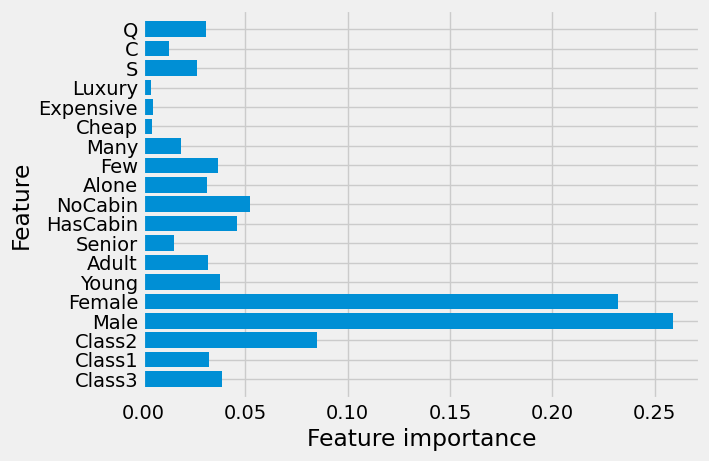

In [24]:
def plot_feature_importances(model, X, features):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(grid_search.best_estimator_, X_train, features)

In [25]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
X_test = pipeline.fit_transform(df_test)
X_test.shape

(418, 19)

In [28]:
y_test = best_rfc.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
submission = pd.DataFrame(df_test["PassengerId"])
submission["Survived"] = y_test
submission.to_csv("submission.csv", index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
